   #                          EXPLORATORY DATA ANALYSIS ON GLOBAL TERRORISM 

#### The goal of this project is to perform Exploratory Data Analysis (EDA) on the terrorism dataset to extract meaningful insights and patterns. By analyzing the dataset, we aim to uncover trends, identify high-risk regions, understand attack characteristics, and potentially reveal factors that contribute to terrorist activities. 

# STEPS INVOLVED IN THE ANALYSIS 

## 1 . IMPORTING THE NECESSARY PACKAGES

## 2 . DATA LOADING AND BASIC INSPECTION

## 3 . EXPLORATORY DATA ANALYSIS



## IMPORTING THE NECESSARY PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import plotly.express as px 
import sklearn

## DATA LOADING AND BASIC INSPECTION

In [2]:
terrorism_data = pd.read_excel("Global Terrorism Index 2023.xlsx")

In [3]:
terrorism_data.head()

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012


In [4]:
terrorism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1793 entries, 0 to 1792
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   iso3c       1793 non-null   object 
 1   Country     1793 non-null   object 
 2   Rank        1793 non-null   int64  
 3   Score       1793 non-null   float64
 4   Incidents   1793 non-null   int64  
 5   Fatalities  1793 non-null   int64  
 6   Injuries    1793 non-null   int64  
 7   Hostages    1793 non-null   int64  
 8   Year        1793 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 126.2+ KB


In [5]:
terrorism_data.describe() ##

,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
count,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.000000,1793.00000
mean,71.691578,2.442817,26.699944,53.537646,74.588957,10.149470,2017.00000
std,35.235705,2.654876,109.500965,253.912698,415.669549,82.306937,3.16316
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.00000
25%,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.00000
50%,82.000000,1.534965,0.000000,0.000000,0.000000,0.000000,2017.00000
75%,106.000000,4.419243,4.000000,2.000000,4.000000,0.000000,2020.00000
max,112.000000,10.000000,1673.000000,4514.000000,9479.000000,2727.000000,2022.00000


In [6]:
terrorism_data.shape

(1793, 9)

In [7]:
terrorism_data.columns

Index(['iso3c', 'Country', 'Rank', 'Score', 'Incidents', 'Fatalities',
       'Injuries', 'Hostages', 'Year'],
      dtype='object')

In [8]:
terrorism_data.isnull()

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1788,False,False,False,False,False,False,False,False,False
1789,False,False,False,False,False,False,False,False,False
1790,False,False,False,False,False,False,False,False,False
1791,False,False,False,False,False,False,False,False,False


In [9]:
terrorism_data.dropna()

,iso3c,Country,Rank,Score,Incidents,Fatalities,Injuries,Hostages,Year
0,IRQ,Iraq,1,9.599967,1288,2086,5050,16,2012
1,PAK,Pakistan,2,9.152620,638,1322,2297,160,2012
2,AFG,Afghanistan,3,9.134265,507,1511,2612,67,2012
3,SYR,Syria,4,8.238079,168,1014,1833,71,2012
4,YEM,Yemen,5,8.098513,219,651,798,121,2012
...,...,...,...,...,...,...,...,...,...
1788,TKM,Turkmenistan,93,0.000000,0,0,0,0,2022
1789,TLS,Timor-Leste,93,0.000000,0,0,0,0,2022
1790,TTO,Trinidad and Tobago,93,0.000000,0,0,0,0,2022
1791,ZMB,Zambia,93,0.000000,0,0,0,0,2022


In [10]:
terrorism_data.values

array([['IRQ', 'Iraq', 1, ..., 5050, 16, 2012],
       ['PAK', 'Pakistan', 2, ..., 2297, 160, 2012],
       ['AFG', 'Afghanistan', 3, ..., 2612, 67, 2012],
       ...,
       ['TTO', 'Trinidad and Tobago', 93, ..., 0, 0, 2022],
       ['ZMB', 'Zambia', 93, ..., 0, 0, 2022],
       ['ZWE', 'Zimbabwe', 93, ..., 0, 0, 2022]], dtype=object)

## EXPLORATORY DATA ANALYSIS

### Top 10 Countries with respect to High incidents

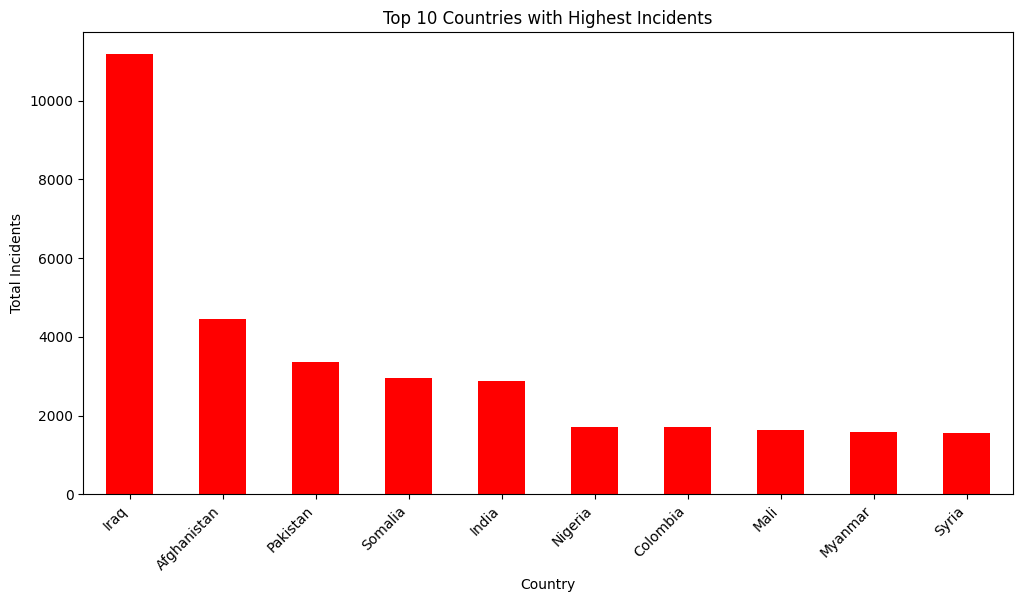

In [11]:
country_group = terrorism_data.groupby('Country')
country_incidents = country_group['Incidents'].sum()
top_10_countries = country_incidents.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_10_countries.plot(kind='bar', color='red')
plt.title('Top 10 Countries with Highest Incidents')
plt.xlabel('Country')
plt.ylabel('Total Incidents')
plt.xticks(rotation=45, ha='right')
plt.show()


### Scatter Plot with Hostages, Injuries, Fatalities, and Country

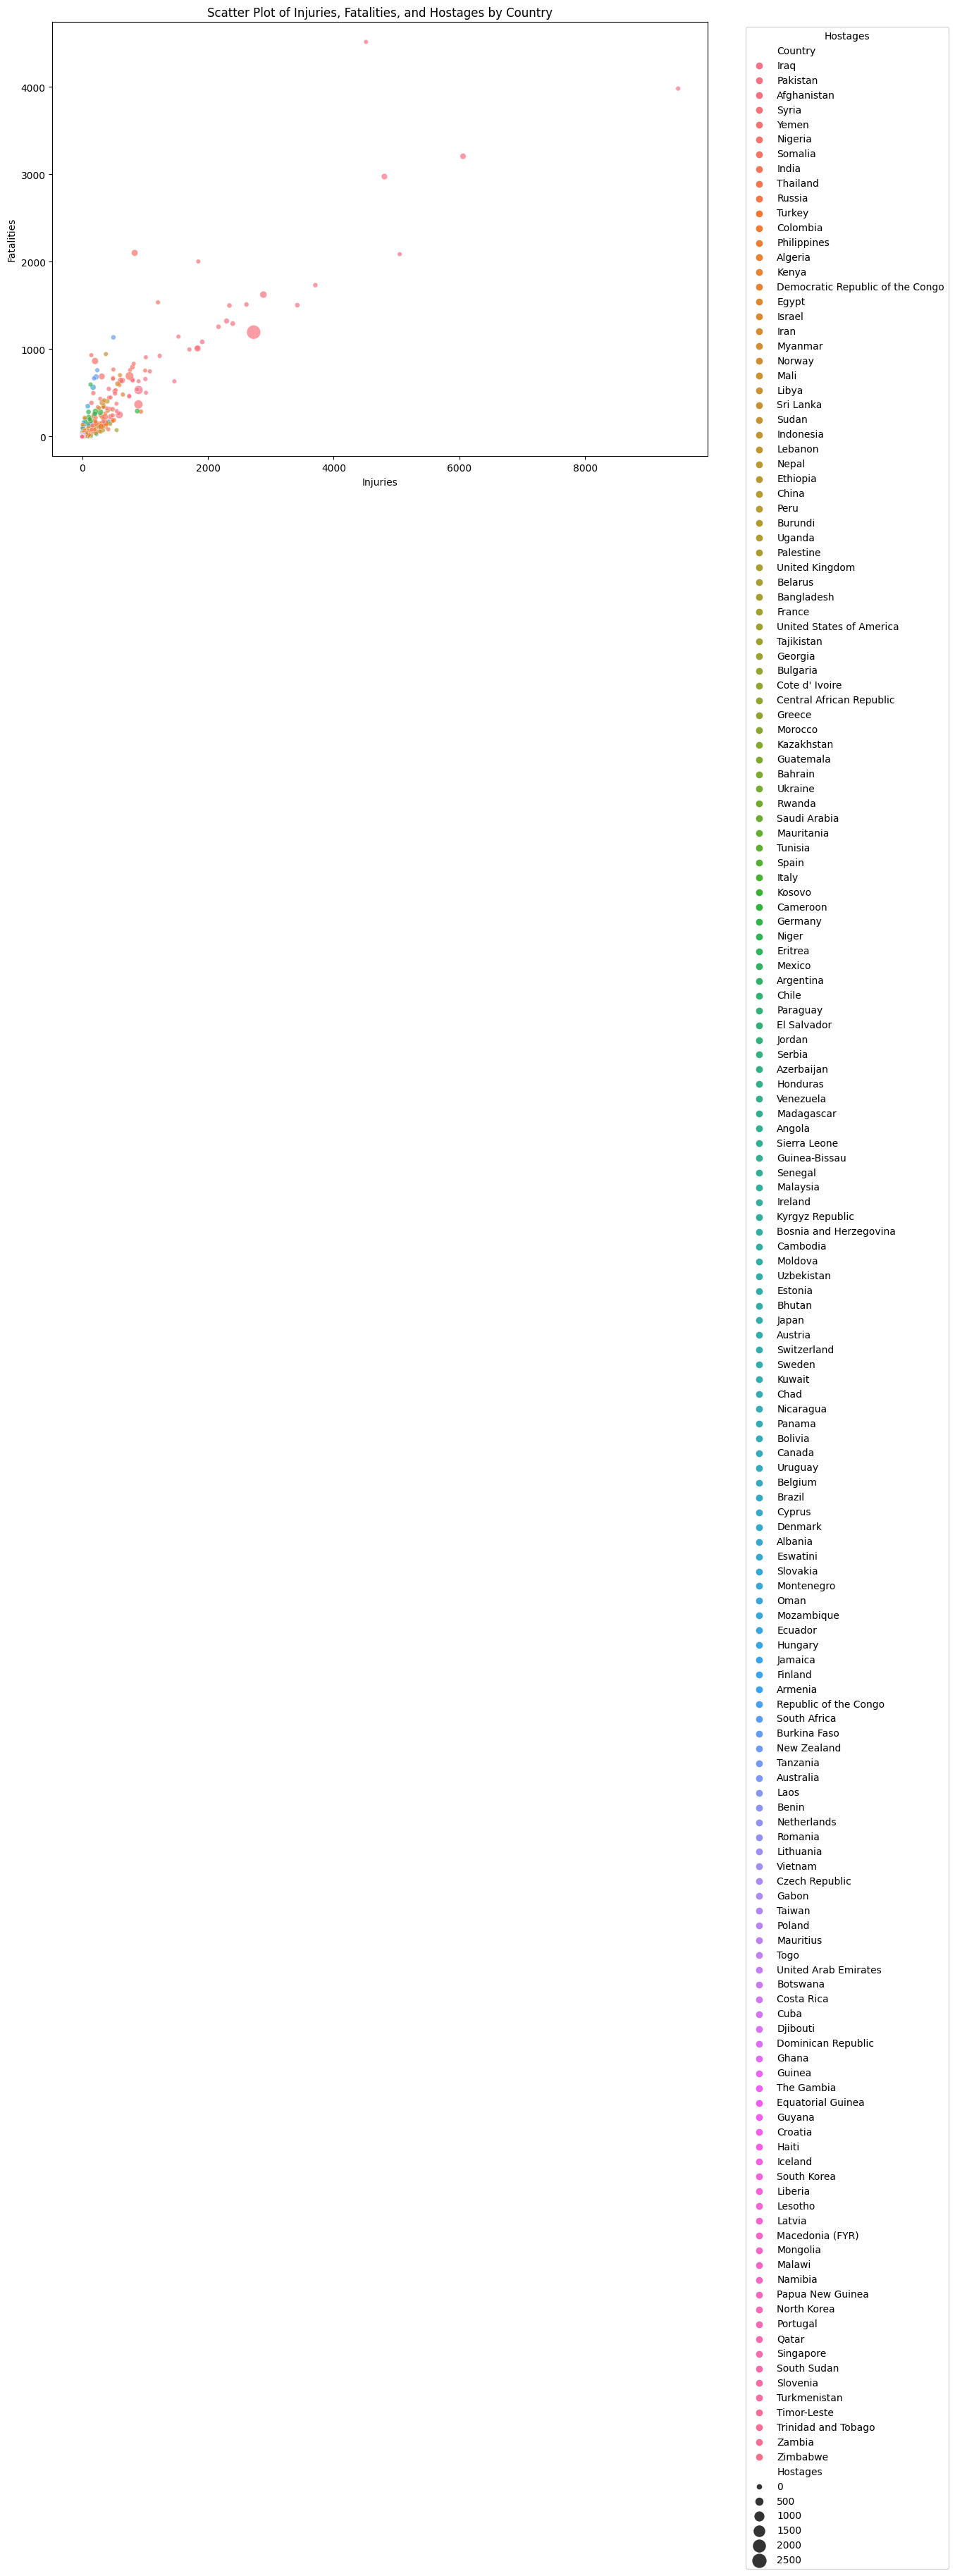

In [12]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Injuries', y='Fatalities', hue='Country', size='Hostages', sizes=(20, 200),
                data=terrorism_data, alpha=0.7)
plt.title('Scatter Plot of Injuries, Fatalities, and Hostages by Country')
plt.xlabel('Injuries')
plt.ylabel('Fatalities')
plt.legend(title='Hostages', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


### Year with Maximum Terrorism

In [13]:
max_year = terrorism_data.groupby('Year')['Incidents'].sum().idxmax()
print(f'The year with the maximum terrorism is: {max_year}')


The year with the maximum terrorism is: 2021


### Country with Maximum Terrorism in the Year with the Maximum Terrorism

In [14]:
max_year_country = terrorism_data[terrorism_data['Year'] == max_year].groupby('Country')['Incidents'].sum().idxmax()
print(f'The country facing maximum terrorism in {max_year} is: {max_year_country}')

The country facing maximum terrorism in 2021 is: Afghanistan


### Time Series Analysis of Terrorism Incidents Over the Years

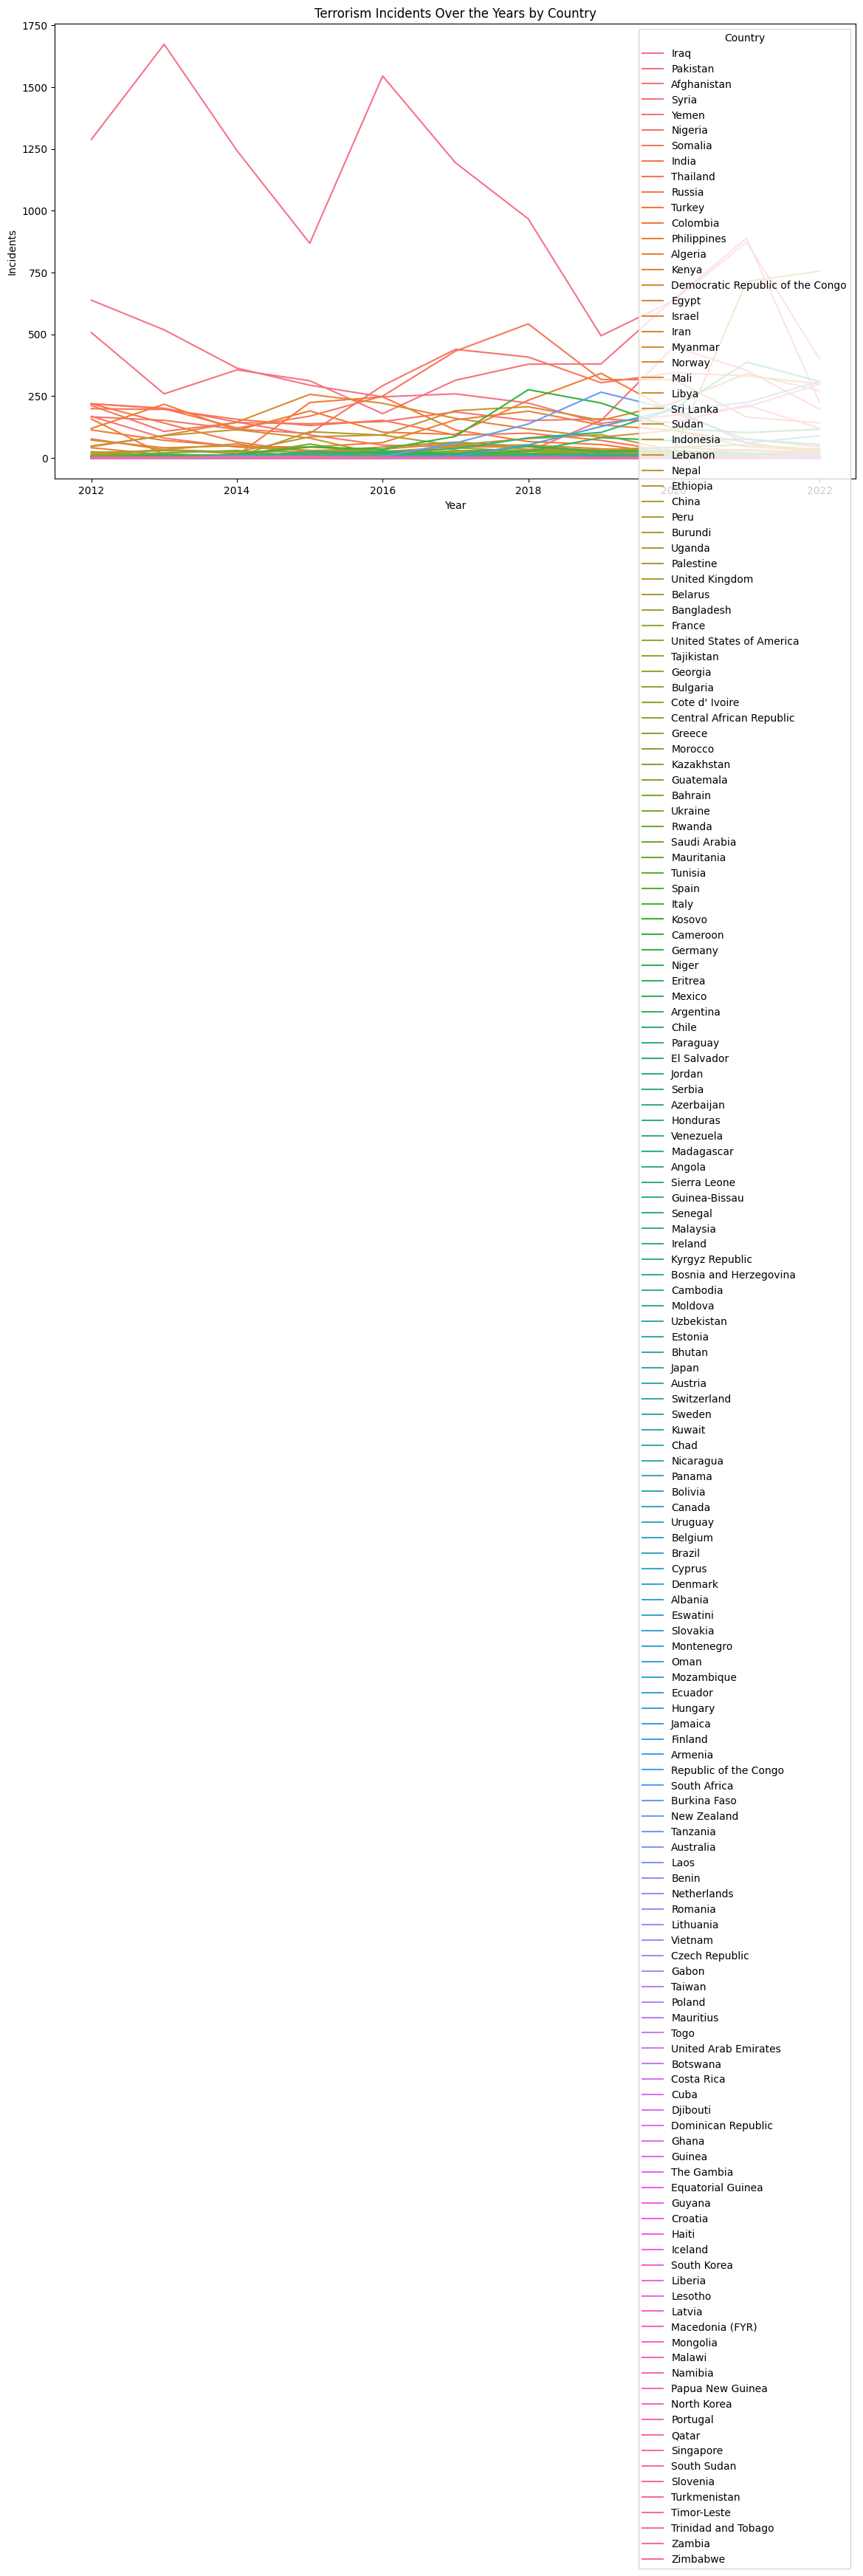

In [15]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Incidents', hue='Country', data=terrorism_data)
plt.title('Terrorism Incidents Over the Years by Country')
plt.xlabel('Year')
plt.ylabel('Incidents')
plt.show()


### Top 10 Fatalities by country and year 

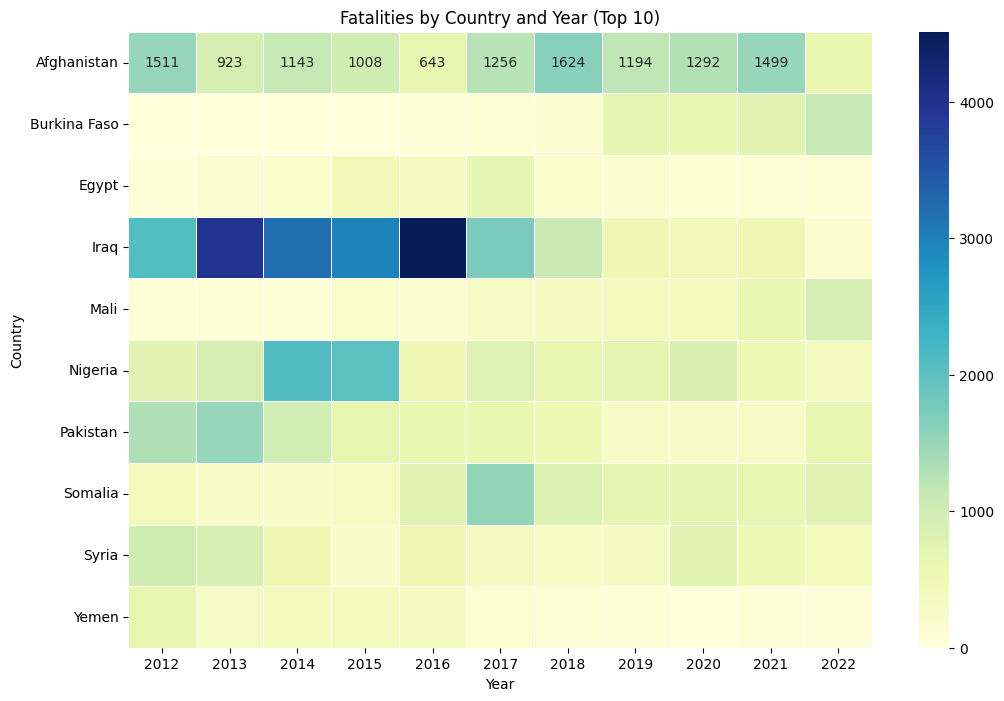

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'terrorism_data' is your DataFrame
country_group = terrorism_data.groupby('Country')

# Sum Incidents for each Country
country_incidents = country_group['Fatalities'].sum()

# Sort and Select Top 10
top_10_countries = country_incidents.sort_values(ascending=False).head(10)

# Create a DataFrame for the heatmap
heatmap_data = terrorism_data[terrorism_data['Country'].isin(top_10_countries.index)]
heatmap_data = heatmap_data.pivot_table(index='Country', columns='Year', values='Fatalities', aggfunc='sum')

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5)
plt.title('Fatalities by Country and Year (Top 10)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()


### Distribution of Scores by Country

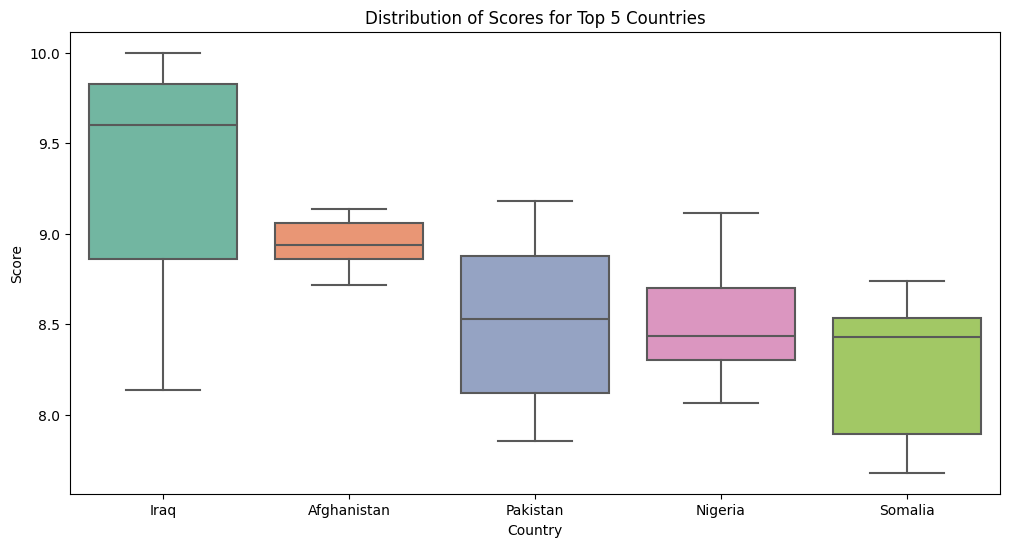

In [17]:
country_scores = terrorism_data.groupby('Country')['Score'].sum()

# Select the top 5 countries
top_5_countries = country_scores.sort_values(ascending=False).head(5).index

# Filter the DataFrame for the top 5 countries
top_5_data = terrorism_data[terrorism_data['Country'].isin(top_5_countries)]

# Plot the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Score', data=top_5_data, order=top_5_countries, palette='Set2')
plt.title('Distribution of Scores for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Score')
plt.show()



### Heatmap of Correlations

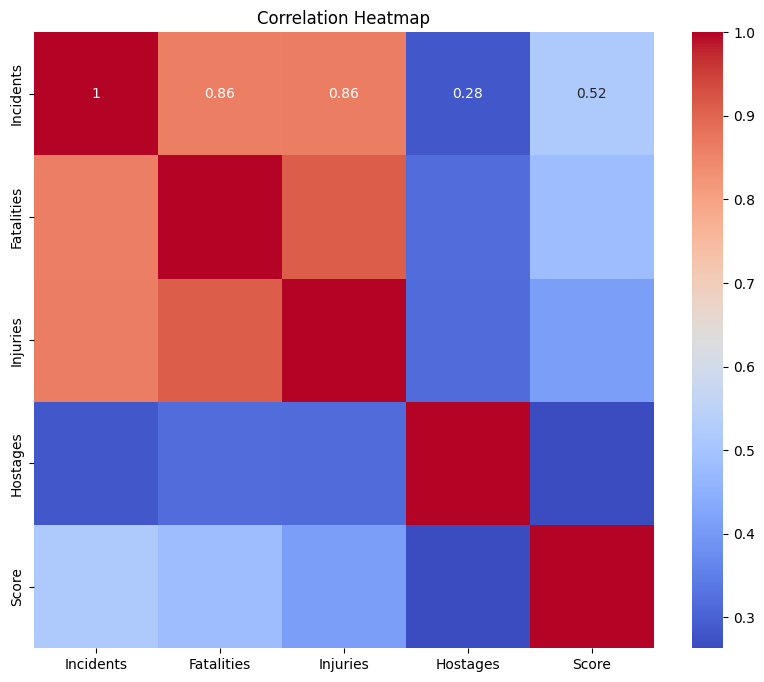

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(terrorism_data[['Incidents', 'Fatalities', 'Injuries', 'Hostages', 'Score']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
